### PA602/PA2605/PA2606: Intermediate Climate Science
# Computer Workshop 3

#### Todays Objectives:
1. Introduce you water vapour absorption in the infrared 
2. Introduce you to the High-resolution Infrared Sounder
3. Write an algorithm to calculate Upper Tropospheric Humidity (UTH)
4. Process a UTH climate data record (CDR) dataset
5. Impliment some analysis
6. Generate outputs to put into overleaf template

#### Python Libraries
For all our computer workshsops we will work with four python libraries:
1. **NumPy** (https://numpy.org/): _"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"_. We will use this for most of our math functions
2. **SciPy** (https://scipy.org/): _"SciPy is a collection of mathematical algorithms and convenience functions built on NumPy . It adds significant power to Python by providing the user with high-level commands and classes for manipulating and visualizing data"_.This is the other library we wil use for statistical/algorithmic functions.
3. **NetCDF4** (https://unidata.github.io/netcdf4-python/): The Network Common Data Form (NetCDF) is specific scientific data format used in climate and earth observation sciences. Each variable is stored in a compressed format along with accompanying meta data. The majority of data you will use in this course wil be stored in this format.
4. **Matplotlib** (https://matplotlib.org/): _"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible"_. We will use this library to visualise the contents of data files and the results from the analyses we perform on these data.

![recap from last CW](img/ndvi_recap.png)

- Last time we looked at how we could use spectral information to infer plant health from satellite refelctance measurments. By using information from two AVHRR channels we calculated a 10 day global NDVI map employing a simple cloud filter.

- Today we are going to move from the visible into the infrared region of the electromagnetic spectrum. We have covered this briefly when we looked at radiaitive transfer in Lecture 2. However, to recap, in the infrared (IR) spectral region we can take the temperature of the Earths surface and see absorption features by gases in our atmosphere.

- From the figure below we can see a normalised radiance measurement from a hyperspectral infrared interferometer, underneath which are transmittance spectra for different gases that absorb in the infrared.

- What you can notice is that water vapour has absorption features across the whole spectral range, with the largest feature between 1500-1700 cm$^{-1}$ (dip in the darkish blue line, second panel). It is this feature we will work with today. 

![absorption regions](img/ghg_ir_absorb_regions.png)

- We now have observations from the infrared spanning ~50 years from low earth observation (LEO) and geostationary earth observation (GEO) staellites. In the example below are two full disk observation from the GOES west for 2 of the 5 imager channels.
- On the left hand side we can see water vapour absorption from a channel centred around 6.5 microns, and on the right hand side - surface emission at 10.68 micons.
- In both images you will notice that the clouds can be seen and are cold features. However, in the right hand image we can see warmer surfaces over land as this channel is exploiting the atmospheric window region, which are not visible in the water vapour image.
- Because the atmospheric is more opaque to IR radiation at 6.5 microns (due to water vapour) we don't see the surface except in cases over very high altitudes were the atmosphere is very thin and dry.
- A new term you will see today is **brightness temperature** or BT, which is another way to look at radiances. Uusally used for the infrared and microwave regions of the EM spectrum, the brightness temperature is a measurement of the radiance of radiation traveling upward from the top of the atmosphere to the satellite, with units expressed as the temperature of an equivalent black body. 

![full disk examples ir bts](img/goes_example_ir_bts.png)

# The High resolution Infrared Radiation Sounder (HIRS)
![hirs](img/HIRS_instrument.png)

- Today you will be using a dataset of observations from the The High-resolution Infrared Radiation Sounder (HIRS) series of instruments.
- HIRS is a family of satellite-borne sensors designed for atmospheric sounding which have been in operation since the late 1970s.
- These instruments measure infrared radiation emitted by the Earth's surface and atmosphere, providing critical data for weather forecasting, climate monitoring, and atmospheric research.

## Platforms Carrying HIRS  
The HIRS instrument has flown on multiple satellite platforms from the late 1970s to the present.

| **Satellite** | **Agency**  | **Launch Year** | **Mission End** |
|--------------|------------|---------------|----------------|
| TIROS-N      | NOAA       | 1978          | 1981          |
| NOAA-6       | NOAA       | 1979          | 1986          |
| NOAA-7       | NOAA       | 1981          | 1987          |
| NOAA-8       | NOAA       | 1983          | 1985          |
| NOAA-9       | NOAA       | 1984          | 1998          |
| NOAA-10      | NOAA       | 1986          | 2001          |
| NOAA-11      | NOAA       | 1988          | 2004          |
| NOAA-12      | NOAA       | 1991          | 2008          |
| NOAA-14      | NOAA       | 1994          | 2007          |
| NOAA-15      | NOAA       | 1998          | 2020          |
| NOAA-16      | NOAA       | 2000          | 2014          |
| NOAA-17      | NOAA       | 2002          | 2013          |
| NOAA-18      | NOAA       | 2005          | 2020          |
| NOAA-19      | NOAA       | 2009          | **Operational** |
| MetOp-A      | EUMETSAT   | 2006          | 2021          |
| MetOp-B      | EUMETSAT   | 2012          | **Operational** |
| MetOp-C      | EUMETSAT   | 2018          | **Operational** |


- The HIRS instruments have 19 channels in the shortwave and thermal infrared aslong with 1 channel in the visible.
- The channels were selected to provide information on the vertical structure of temperature and water vapour for numerical weather prediction (NWP).

## HIRS Channel Information  
The HIRS instrument has **19 infrared channels and 1 visible channel**, designed to measure temperature, humidity, ozone, cloud cover, and surface properties Table adapted from KLAES, K., 1994. Estimation of satellite derived temperature and moisture fields over Europe from TOVS data using 3 I and ITPP algorithms(Final Report, Nov. 1990- Jun. 1992).


| **HIRS Channel Number** | **Channel Central Wavenumber (cm⁻¹)** | **Central Wavelength (µm)** | **Principal Absorbing Constituents** | **Level of Peak Energy Contribution (hPa)** |
|---------------------------|--------------------------------------|-----------------------------|--------------------------------------|--------------------------------------------|
| 1                         | 668                                  | 15.00                       | CO₂                                  | 30                                         |
| 2                         | 679                                  | 14.70                       | CO₂                                  | 60                                         |
| 3                         | 691                                  | 14.50                       | CO₂                                  | 100                                        |
| 4                         | 704                                  | 14.20                       | CO₂                                  | 400                                        |
| 5                         | 716                                  | 14.00                       | CO₂                                  | 600                                        |
| 6                         | 732                                  | 13.70                       | CO₂/H₂O                              | 800                                        |
| 7                         | 748                                  | 13.40                       | CO₂/H₂O                              | 900                                        |
| 8                         | 898                                  | 11.10                       | Window                               | Surface                                    |
| 9                         | 1028                                 | 9.70                        | O₂                                   | 20                                         |
| 10                        | 1217                                 | 8.30                        | H₂O                                  | 900                                        |
| 11                        | 1364                                 | 7.30                        | H₂O                                  | 700                                        |
| 12                        | 1484 (TIROS-N to NOAA-14) / 1534 (NOAA-15 onward) | 6.70 (TIROS-N to NOAA-14) / 6.50 (NOAA-15 onward) | H₂O | 500 |
| 13                        | 2190                                 | 4.57                        | N₂O                                  | 1000                                       |
| 14                        | 2213                                 | 4.52                        | N₂O                                  | 950                                        |
| 15                        | 2240                                 | 4.46                        | CO₂/N₂O                              | 700                                        |
| 16                        | 2276                                 | 4.40                        | CO₂/N₂O                              | 400                                        |
| 17                        | 2361                                 | 4.24                        | CO₂                                  | 5                                          |
| 18                        | 2512                                 | 4.00                        | Window                               | Surface                                    |
| 19                        | 2671                                 | 3.70                        | Window                               | Surface                                    |
| 20                        | 14367                                | 0.70                        | Window                               | Surface                                    |



- Another way to look at this information is via the weighting functions for each channel.
- A weighting function gives the theoretical change in brightness temperature (BT) that results from a unit change in that parameter at a given height.
- The figure below shows some typical weighting function for HIRS, **note** these have been normalised so that they are unitless. Usually they would have units, which can vary (e.g. the weighting functions for H$_{2}$O look diffeent to those for relative humidity).
- We will be working with a observations from channel 12, which give us information on water vapour in the upper troposphere.

![weighting functions](img/HIRS_weighting_functions.png)

## Lets look at the data
first we will load our python libraries

In [1]:
# load netCDF4 library
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

![details on data](img/noaa_detail_ch12_bts.png)

- Todays dataset we will be working with is produced by Dr Lei Shi (https://www.researchgate.net/profile/Lei-Shi-106) and her team at NOAA.
- In the file you will find monthly mean Channel 12 brightness temperatures from January 1978 to December 2024, which have been cloud cleared, bias and limb corrected.
- What does this mean? The dataset you will work with has beeen harmonised to remove jumps between the different platforms, account for the measurements that have different atmospehric path lengths (off nadir views) and remove measurements with cloud in them.
- Therefore, you are starting with what is known as a climate data record.

### Lets define the path to where the file is stored:

In [2]:
# define filename with path
filename="data/noaa_hirs_ch12_BTs_monthly_197901_202412.nc"

### next we can paste in our function that reads in gridded netCDF data from CW 1 and 2:

In [3]:
def read_gridded_data(filename, report=True):
    """ function to read regular gridded data files and return a Python dictionary.
    inputs: filename -> name of file to be read
            report   -> boolean flag, if true then a table listing the file contents is printed to screen

    outputs: data    -> a python dictionary containing the file contents
    """
    # open the file and map the contents to a netCDF object. Use a test to capture
    # any issues with the data file
    try:
        nc = netCDF4.Dataset(filename,"r")
    except IOError:
        raise
    # if report is set to true then prind global attributes
    if report == True:
        print(f"Global Attributes For File: {filename}") # when witing strings, starting them with an 'f' allows you to insert other variables using {}.
        print("----------------------------------------------------------------------------------------------------")
        print(nc)
    # Define a dictionary to hold the contents
    data = {} 
    # loop over the file contents and write
    if report == True:
        # what variables are in this file?
        # printing Aligned Header 
        print("-------------------------------------------------------------------")        
        print(f"{'Variable Name' : <14} |{'Long Name':<32} |{'tdim, ydim, xdim':>17}") 
        print("-------------------------------------------------------------------")
    else:
        pass # we add a pass so we can close this if statement with an else

    for varname in nc.variables.keys():
        if report == True:
            print(f"{varname:<14} |{nc[varname].long_name:<32} |{', '.join([str(d) for d in nc[varname].shape]):>17}")
        else:
            pass
        # write the variable to the dictionary
        data[varname] = nc[varname][:] #  the [:] at the end indexes all the data
    
    # finally close the file
    nc.close()

    # return the filled data dictionary
    return data

### lets read in the data, setting the report flag to ``True`` so we can see what is inside:

In [4]:
# read in the HIRS data and print the contents information to screen, we set report to True so that we get details on the file contents
hirs_data = read_gridded_data(filename, report=True)

Global Attributes For File: data/noaa_hirs_ch12_BTs_monthly_197901_202412.nc
----------------------------------------------------------------------------------------------------
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: IR Sounder Upper Tropospheric Humidity BT
    source: NOAA archive of Level 1b HIRS and Level 1c IASI dataset
    references: https://doi.org/10.1029/2010JD014847
    history: 1) 201009, Lei Shi, NCDC, created v02r01. 2) 201401, Lei Shi, NCDC, updated to v02r06. 3) 201503, Lei Shi, NCDC, updated to v03r00. 4) 201903, Lei Shi, NCEI, updated to v03r01. 5) 202102, Lei Shi, NCEI, updated to v03r02, 202302, Lei Shi, NCEI, updated to v04r00.
    conventions: CF-1.7,ACDD1.3,Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    naming_authority: gov.noaa.ncei
    date_created: 2023-08-01T16:40:19Z
    license: These data were produced by NOAA and are not subject to copyright prot

## Task 1: Visual inspection of the data


- Here we will you the ability to animate figures in Jupyter notebooks to examine the data

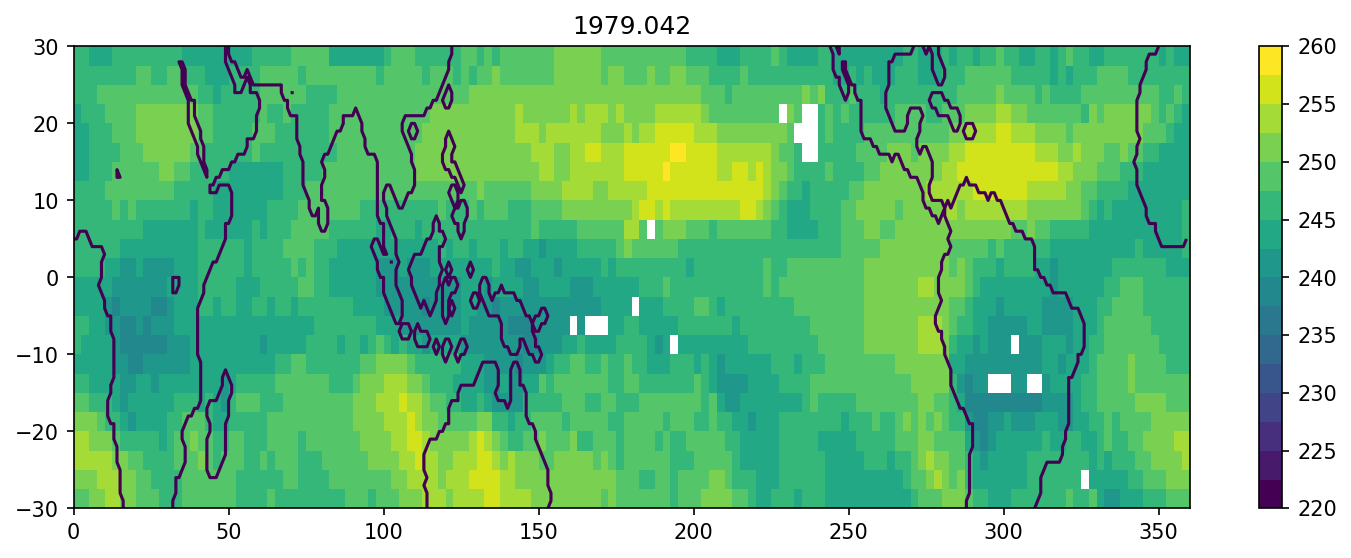

In [5]:
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()



fig = plt.figure(figsize=(12,4))
def animate(t):

    nyears = 0
    offset = 12*nyears
    
    #year = int(hirs_data['time'][t]) # fractional year to integer
    fig.clear()
    ax = plt.subplot(1,1,1)
    plot = ax.pcolormesh(hirs_data['longitude'], hirs_data['latitude'],
                         hirs_data['ch12'][t+offset,:,:],vmin=220,vmax=260, cmap=plt.get_cmap('viridis',16))
    ax.contour(hirs_data['LSM_lon'], hirs_data['LSM_lat'], hirs_data['LSM'], levels=[0,1])
    cbar = plt.colorbar(plot)
    ax.set_title(f"{hirs_data['time'][t+offset]:0.3f}")
    return ax
matplotlib.animation.FuncAnimation(fig, animate, frames=36,interval=500)


- if you change the nyears variable and rerun the cell it will show you a different set of plots.
- Note, if nyears is greater than 52 years then it probably give an error 

In [6]:
# IMPORTANT - make sure you executethis line for the rest of the notebook to work
%matplotlib inline
plt.close()

- Lets examine the 240 K isotherm data with a simple plot to screen
- We will also add the land sea information so we can see the continents  

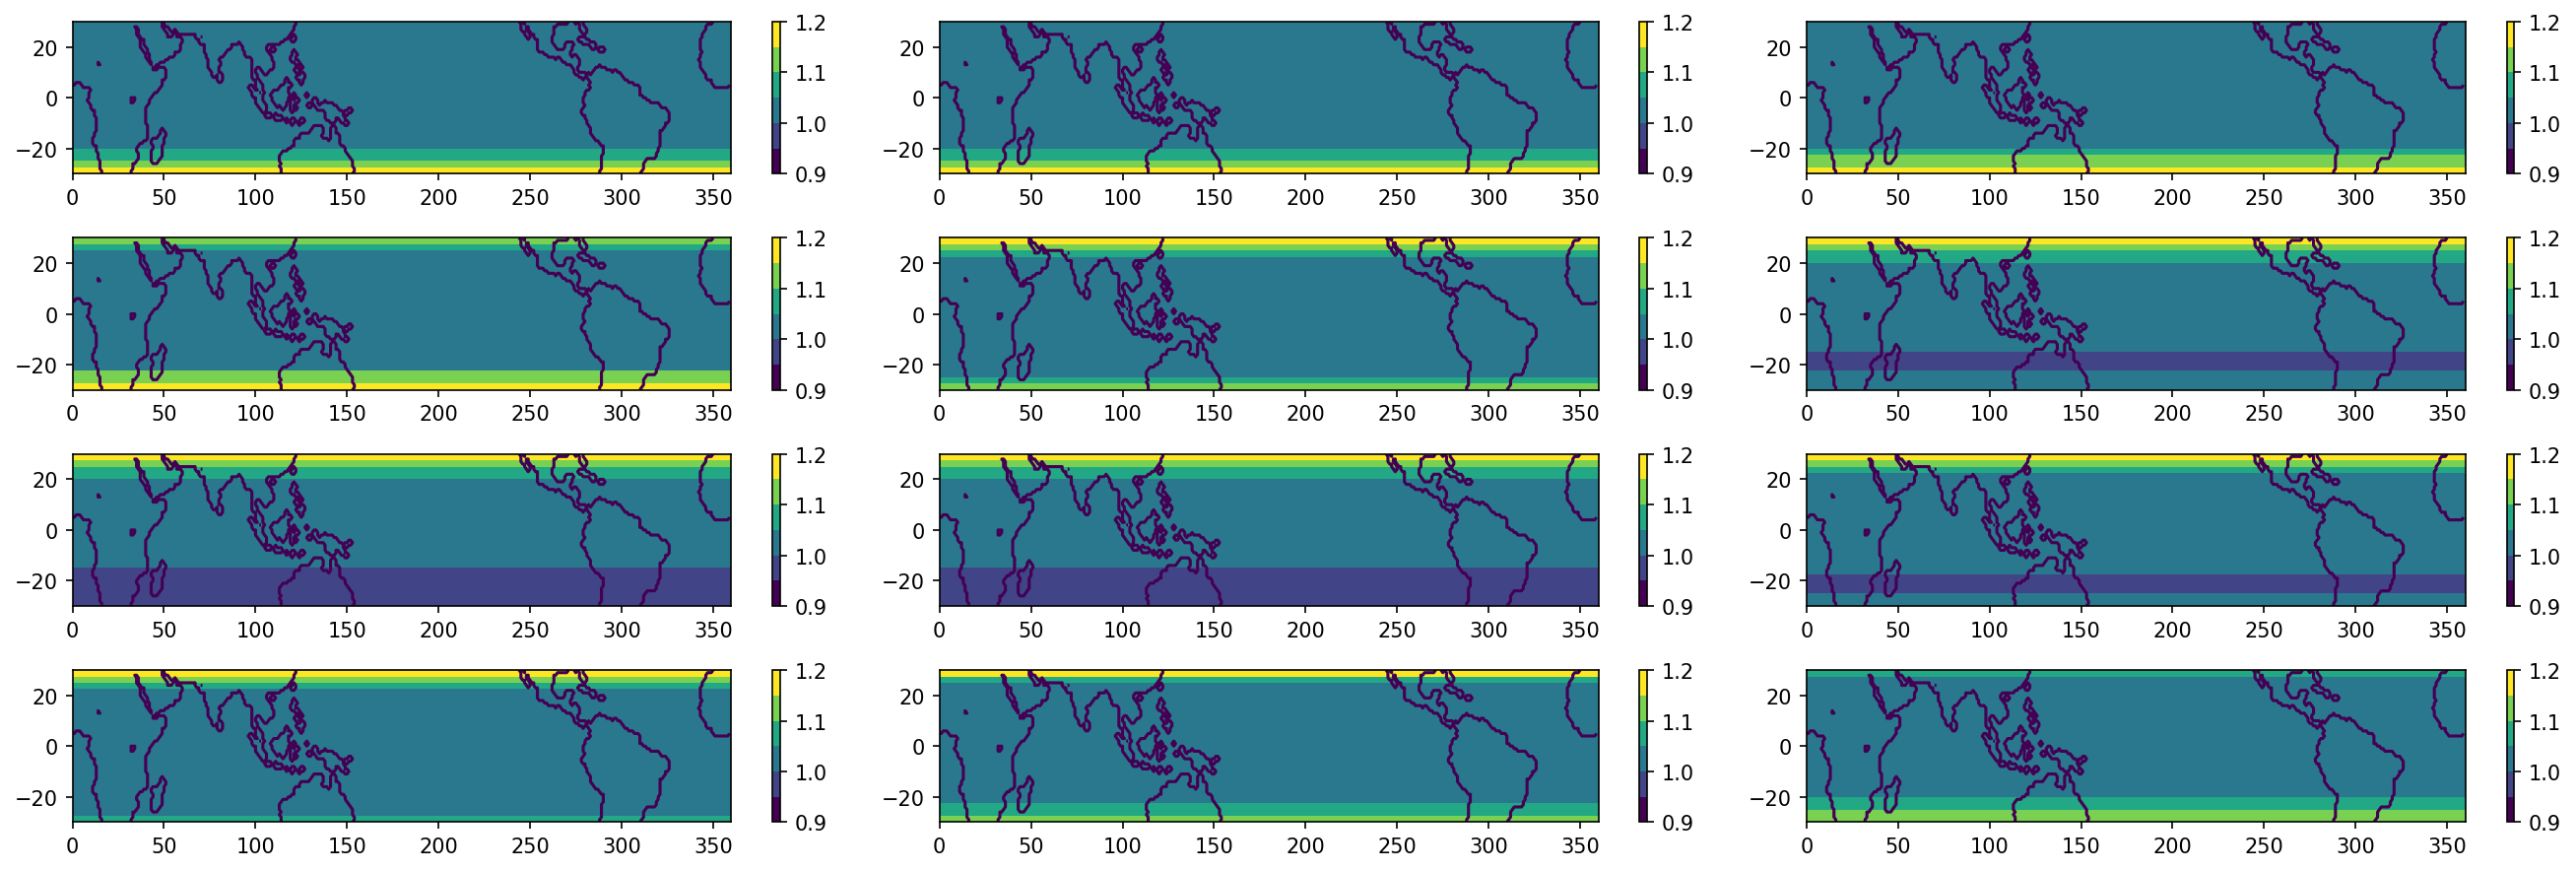

In [7]:
# define a figure size
plt.figure(figsize=(18,6),dpi=150)
# loop over eachmonth from 0-11
for mth in range(12):
    # index the subplot where the information will be shown
    plt.subplot(4,3,mth+1)
    # do a simple pcolormesh plot
    plt.pcolormesh(hirs_data['longitude'], hirs_data['latitude'],hirs_data['p0'][mth,:,:],
                   vmin=0.9,vmax=1.2, cmap=plt.get_cmap('viridis',6))
    # add a colorbar
    plt.colorbar()
    # contour the land ountline over the top               
    plt.contour(hirs_data['LSM_lon'], hirs_data['LSM_lat'], hirs_data['LSM'], levels=[0,1])
plt.tight_layout()

## What do we observe?

## Upper Tropospheric Humidity

![](img/water_vapour_amounts_troposphere.png)

- Upper Tropospheric Humidity (UTH) refers to the amount of water vapor present in the upper portion of the troposphere, typically above 500 hPa (~5–12 km altitude). It plays a critical role in Earth's climate system by influencing radiative transfer, cloud formation, and atmospheric circulation.

- Infrared observations provide near-global coverage, enabling continuous monitoring of UTH with high temporal and spatial resolution. However, these measurements are affected by factors such as cloud contamination, retrieval uncertainties, and variations in instrument calibration. Additionally, IR sensors are most sensitive to clear-sky conditions, which may introduce sampling biases by excluding areas with thick cloud cover.

- Infrared satellites estimate UTH by detecting thermal radiation emitted by the atmosphere at wavelengths sensitive to water vapor absorption, primarily in the 6.3 µm band. These measurements typically represent relative humidity weighted by the radiative contribution of water vapor in the upper troposphere.

- Infrared satellite measurements provide a vital observational dataset for monitoring upper tropospheric humidity. Despite some limitations, they offer invaluable insights into atmospheric moisture distribution and its role in weather and climate processes. Ongoing advancements in satellite technology and data assimilation techniques continue to enhance the accuracy and applicability of UTH observations.

![](img/UTH_vs_Tb.png)

### Task 2: Estimating UTH from HIRS

- To estimate UTH from an infrared sounder like HIRS we can exploit a simple linear transformation relationship between the observed BT values from the water vapour absorption channel (T$_{6.7}$) and the natural logarithm of the UTH.
- For clear-sky averaged upper tropospheric humidity, we can estimate values from T$_{6.7}$ thus:
   
### $UTH = \frac{cos{\theta}}{p_{0}}e^{(a + b \times T_{6.7})}$

- where $\theta$ is the satellite viewing angle, $p_{0}$ is the normalised 240 K isotherm, and $a$ and $b$ are the regression coefficients. For the HIRS BT CDR you are working with these have already been calculated and 31.5 and -0.115 respectively.
- For the viewing angle, the dataset has been limb corrected. This means that he BTs have been adjusted so they represent a nadir view (i.e. looking straight down) so we can assume that $\theta$ = 0$^{\circ}$ for grid cells. This simplifies our $cos \theta$ term to = 1.
- In the cell below create a function to calculate the UTH, below you will see ahint on how to get started:
  
```python
def calc_uth():
    """ calculate the clear-sky UTH for the NOAA HIRS CDR
    inputs: T6_7  -> HIRS WV channel BTS @ 6.7 microns [K]
            p0    -> normalised 240 K isotherm

    outputs: UTH  -> clear-sky UTH [%]
    """
    # define linear fit intercept
    a = 
    # define linear fit gradient
    b = 
    # calculate clear-sky UTH, assuming cos theta = 1. Note for exponentials
    # you can use the np.exp() method
    uth =  
    # return the clear sky UTH
    return uth

In [8]:
# write your function calc_uth here
# if you getr stuck look at hints/calc_uth.py


### Task 3: Creating our Climate data Record of Upper Tropospheric Humidity
- Now we have an alogorithm we can loop over each time step in the data (1 month) and calculate the UTH
- Our workflow will follow the these four steps:
    1. Initalise an array with the same dimensions as ```hirs_data['ch12']``` to store our results using the np.full method
    2. Use the time dimesion to step over the channel 12 brightness temperatures, creating a month index between 0-11 to select the correct $p0$ climatology
    3. Apply the calc_uth algorithm and store the result
    4. mask bad values based on the valid BT range of 220 to 260 K
- This will give us a dataset we can begin to investigate and analyse       

In [9]:
#1. initalise uth array
tdim, ydim, xdim = hirs_data['ch12'].shape
uth = np.full((tdim, ydim, xdim), np.nan)

# 2. step over the time dimension with a for loop
for tt in range(tdim):
    # create a index value between 0-11 to select the correct p0 values. Here we use the modulus operator, which in Python is the % sign. These 
    # values map accordingly:
    #  | tt  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 
    #--------------------------------------------------------------------------------------------------------------------- ....
    # | mdx | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 
    mdx = tt % 12
    
    # 3. calculate UTH and store it using tt to select the correct place in the time dimension, and :,: to tell the interpretor
    # that the y and x dimensions are the same as those defined for uth
    uth[tt,:,:] = calc_uth(hirs_data['ch12'][tt,:,:], hirs_data['p0'][mdx,:,:])

    # create a mask and set bad values to NaN
    bad = np.where((hirs_data['ch12'][tt,:,:] < 220)|(hirs_data['ch12'][tt,:,:] > 260))
    uth[tt,:,:][bad] = np.nan
    

- lets quickly check the range of the data by plotting a quick histogram

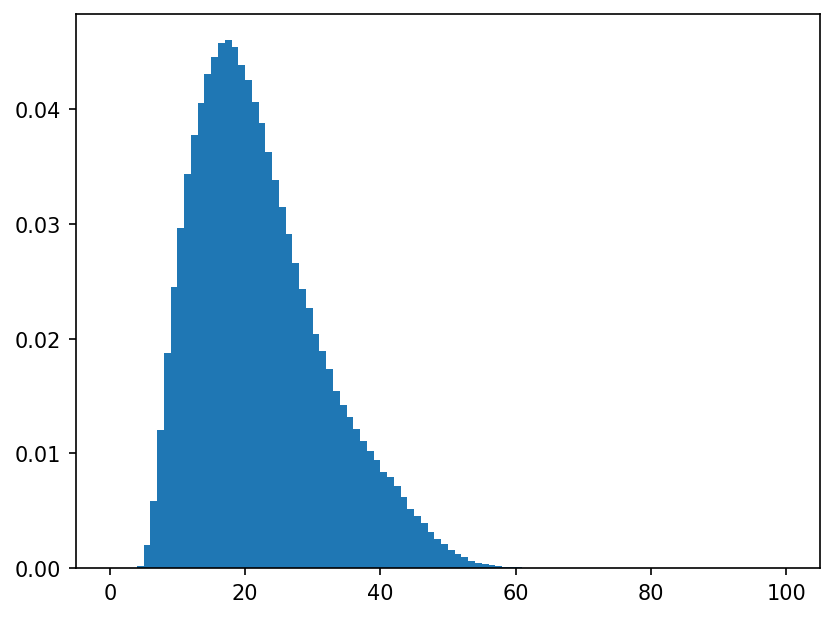

In [10]:
hist = plt.hist(uth.flatten(), range=(0,100), bins=100,density=True)

### Task 4
- Now lets look at the data, for this we will plot the long term monthly mean UTH for January, February etc
- To do this we loop over each of the 12 months, and like how we used the modulus to create between 0-11 we can select every nth step value in an array
- This is achived by using a initial value (month index), then a double colon, followed by the max range (number of months) all enclosed by 2 saaquare brackets: e.g. ```[0::12]``` -> every january
- we then plot a map of the monthly climatology by selecting all valid time steps (as above) and using the ```np.nanmean()``` method to calculate an average (this version can handle nan values). With this method we can control the axis in the data we apply the operation (we did this in the first workshop) by using the kwargs ```axis=```
- finally we plot a contour line from our land sea mask so we can see hoe the UTH relates to ocean and continents

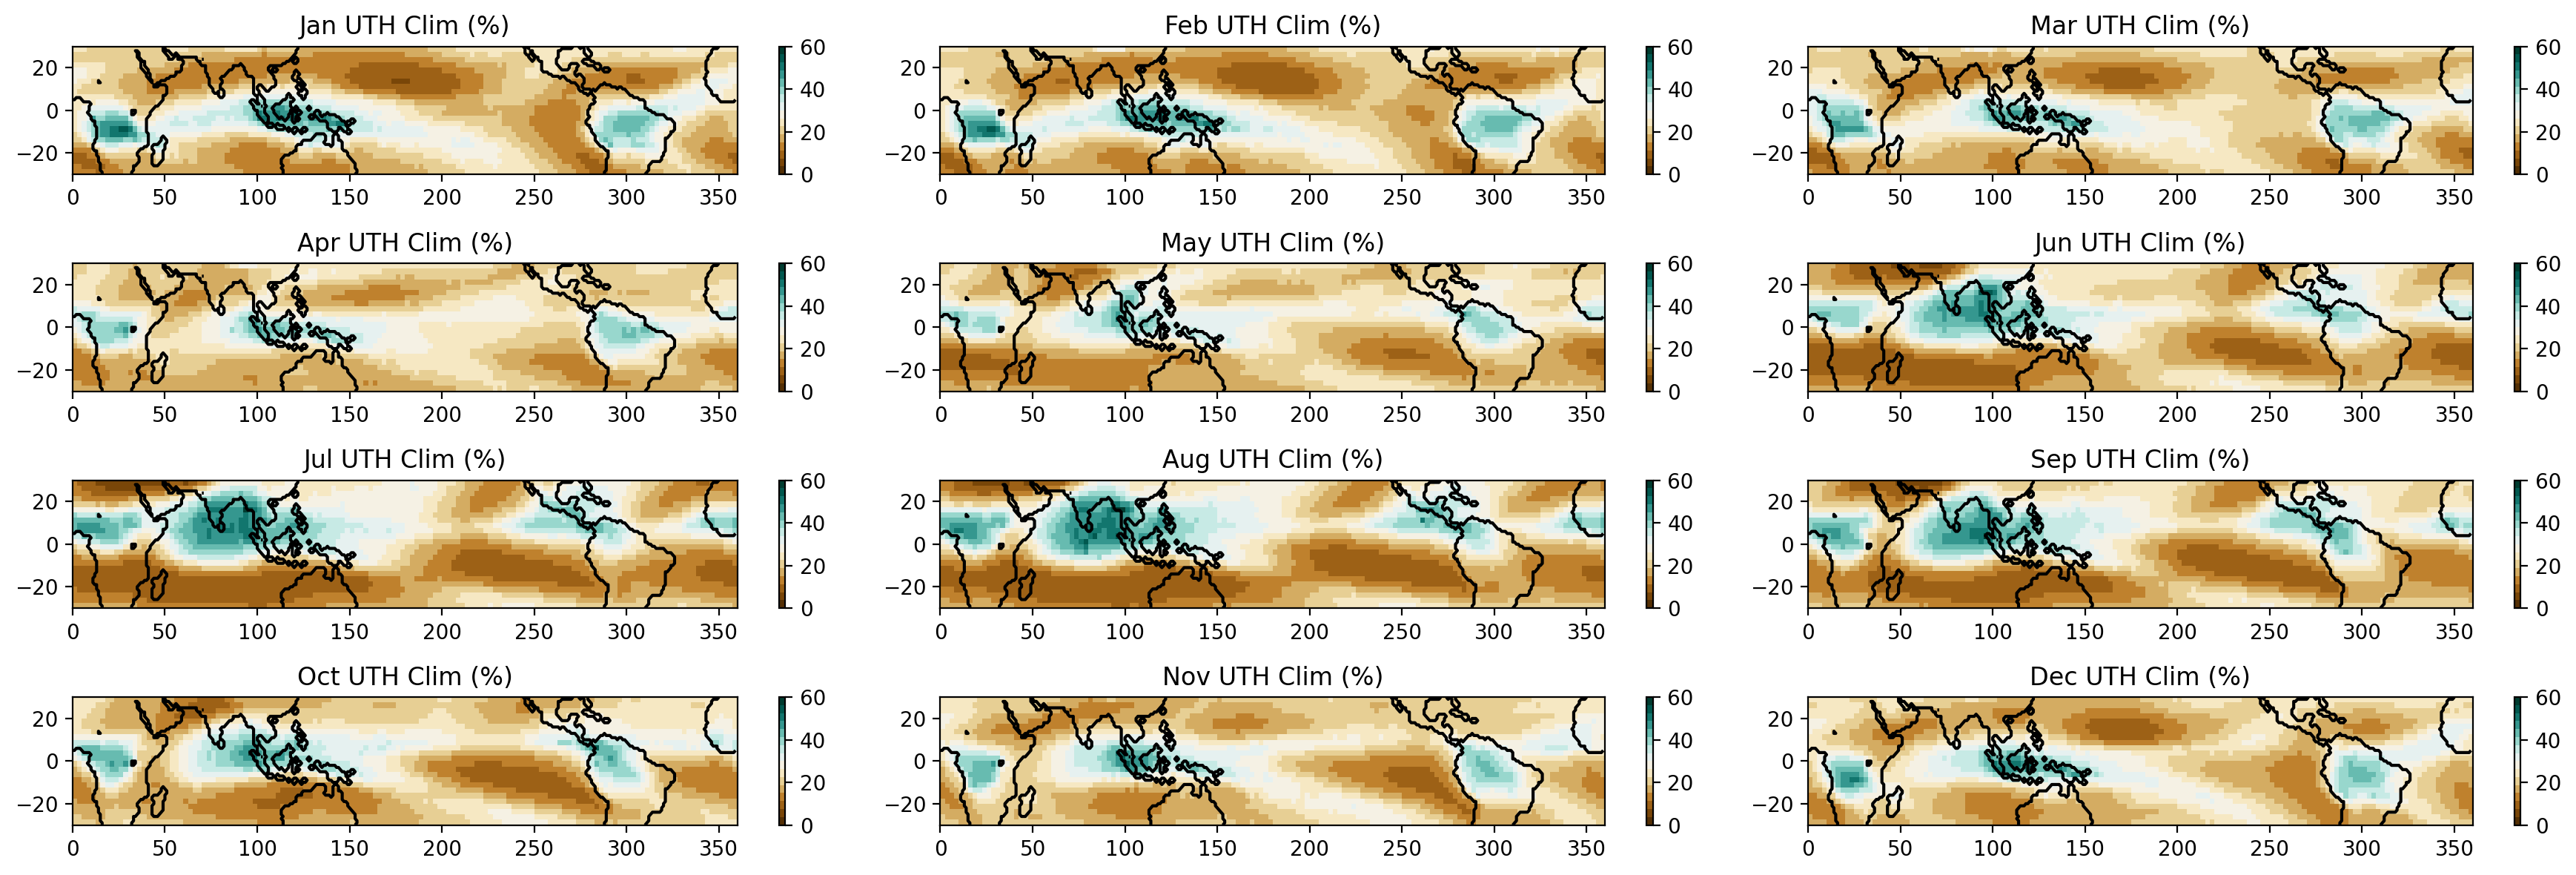

In [11]:
# define our figure size
plt.figure(figsize=(18,6),dpi=200)

Month_Names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

# loop over each month index from 0 to 11
for mth in range(12):
    # set up the subplots and index correctly
    plt.subplot(4,3,mth+1)
    # plot the mean UTH climatology for month mth, set the color range between 
    # 0 and 60 % RH with 16 steps in the colourbar
    plt.pcolormesh(hirs_data['longitude'], hirs_data['latitude'],
                   np.nanmean(uth[mth::12,:,:],axis=0),
                   vmin=0,vmax=60, cmap=plt.get_cmap('BrBG',16))
    
    # add the colour bar
    plt.colorbar()
    # add the continental outlines using contour. In this data 0 = ocean and 1 = land, so we justr add 2 levels 
    # [0, 1] to capture this boarder
    plt.contour(hirs_data['LSM_lon'], hirs_data['LSM_lat'], hirs_data['LSM'], levels=[0,1], cmap=plt.get_cmap('Greys_r'))

    # add a title
    plt.title(f"{Month_Names[mth]} UTH Clim (%)")

# apply tight_layout() to optimise the white space
plt.tight_layout()

# save the figure (use this later)
plt.savefig("hirs_uth_monthly_clim.pdf")

### Task 5
- Now we are going to calculate some timeseries for analysis later on
- The approach will be very similar to what we saw in workshop 1, however, we are writingthe code inline with our current flow rather than create specific functions. This allows us to continue to intergate the data as we move through the process and look for issues
- So we start by calculating the weighted mean UTH between $\pm$30$^{\circ}$, whichwe will reffer to as 'global' from here on in.  

In [12]:
# use meshgrid to create a 2D array of latitudes - we also get longitudes at the same time
x2d, y2d = np.meshgrid(hirs_data['longitude'], hirs_data['latitude'])

# calculate the weights
wgts = np.cos(np.radians(y2d))

# delete the data we now longer need
del y2d,x2d

# define the array to hold the UTH timeseries
uth_ts = np.full(tdim, np.nan)

# loop over each time step and calculate the weighted mean UTH and store in our new array
for tt, rh in enumerate(uth):
    mdx = tt % 12
    uth_ts[tt] = np.nansum(uth[tt,:,:]*wgts)/np.nansum(wgts)

- now we have our weighted mean timeseries we can calculate a quick anaomaly time series (based on whole length of record)
- we can then make a simple plot to visualise the result

(1979.0, 2025.0)

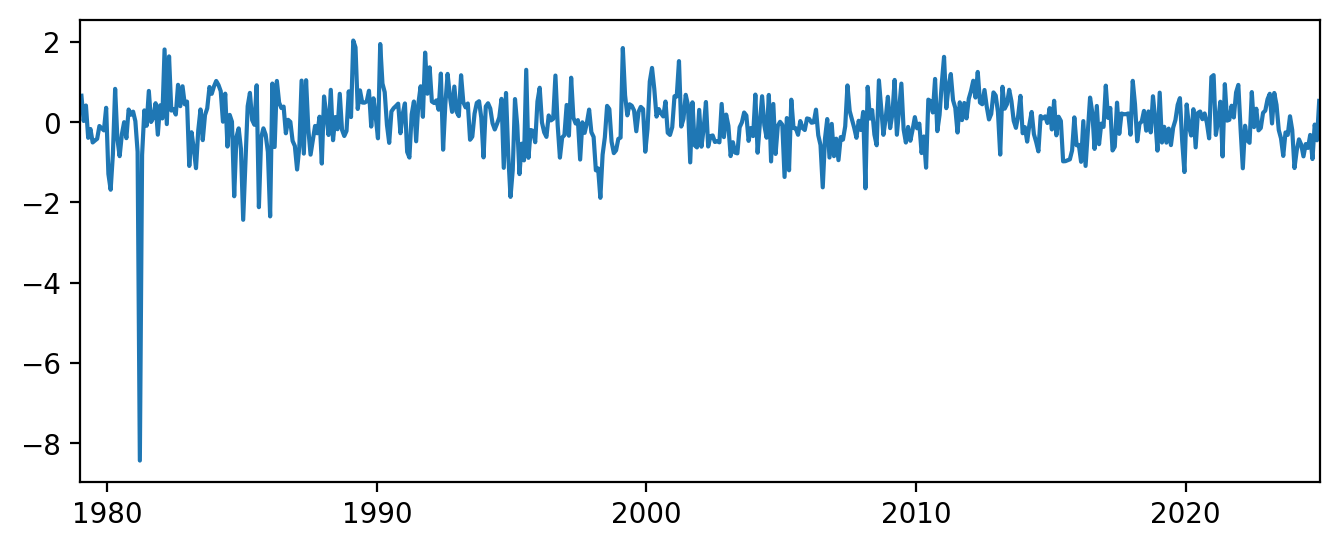

In [13]:
# define the anomolay time series array
anom = np.full(uth_ts.size, np.nan)

# loop over all 12 months
for mth in range(12):
    # use the select all points at a regular step interval we saw previously
    # calculate a mean UTH for month mth across all years and subtract from
    # all points in the timeseries which correspond to month mth
    anom[mth::12] = uth_ts[mth::12] - np.nanmean(uth_ts[mth::12])
    
# make a simple plot
# define the figure size
plt.figure(figsize=(8,3),dpi=200)
# plot the anomaly time series
plt.plot(hirs_data['time'], anom)
# set the limits of the x axis
plt.xlim(1979,2025)

### what can we see from this plot?
- there is a large anomaly after 1980, which may or maynot correspond to a natural phenomenon
- the easist way to examine this is first look again at the UTH map
- we can find the position by indexing the minimum anomaly value in our timeseries

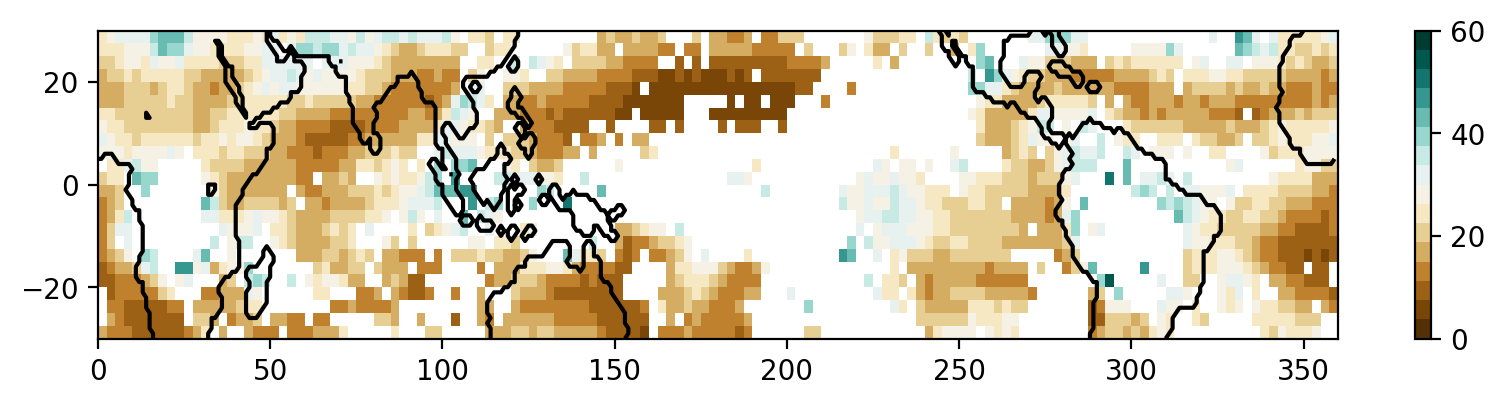

In [24]:
# idenify the low peak using the numpy.argmin method. This return the array index value
peak = np.argmin(anom)
# simple plot of the UTH, here i have just reused code from above
plt.figure(figsize=(10,2),dpi=200)
plt.pcolormesh(hirs_data['longitude'], hirs_data['latitude'],uth[peak,:,:],vmin=0,vmax=60, cmap=plt.get_cmap('BrBG',16))
# add the colour bar
plt.colorbar()
# add the continental outlines using contour. In this data 0 = ocean and 1 = land, so we justr add 2 levels 
# [0, 1] to capture this boarder
plt.contour(hirs_data['LSM_lon'], hirs_data['LSM_lat'], hirs_data['LSM'], levels=[0,1], cmap=plt.get_cmap('Greys_r'))

### what do we see?
- This map is missing alot of data which is biasing what we are seeing
- Therefore, we will replace this map with a climatology based on all the data

In [25]:
# identify the month we need to calculate the climatology for
# using the modulus operator
mth = peak % 12

# then calculate the climatology we use to replace the bad data 
uth[peak,:,:] = np.nanmean(uth[mth::12,:,:],axis=0)

### lets see if this has worked? recalculate the anomaly time series and replot

(1979.0, 2025.0)

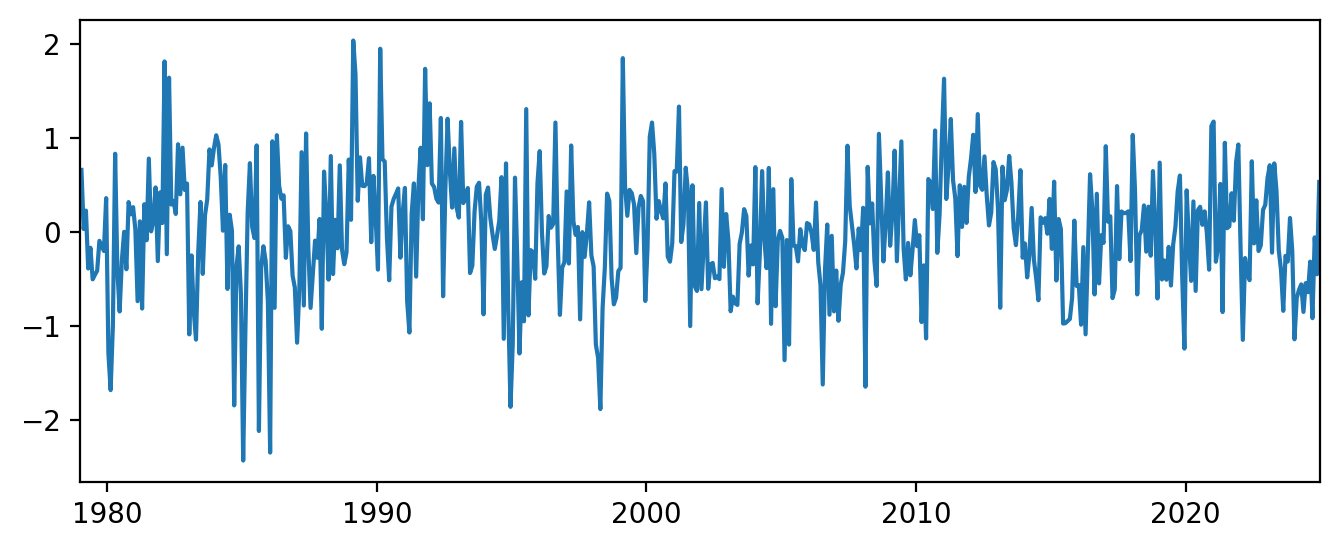

In [26]:
# recalculate the UTH weighted mean timeseries
for tt, rh in enumerate(uth):
    mdx = tt % 12
    uth_ts[tt] = np.nansum(uth[tt,:,:]*wgts)/np.nansum(wgts)

# recalculate the anomaly timeseries
anom = np.full(uth_ts.size, np.nan)
for mth in range(12):
    anom[mth::12] = uth_ts[mth::12] - np.nanmean(uth_ts[mth::12])
    

# make a simple plot
# define the figure size
plt.figure(figsize=(8,3),dpi=200)
# plot the anomaly time series
plt.plot(hirs_data['time'], anom)
# set the limits of the x axis
plt.xlim(1979,2025)

### looks better?

### Task 6: Calculate time series for analysis
- Now we will prepare the data that is to be used for our analysis
- We want to be able to mask the ocean  and land surfaces sothat we can examine the differences
- For this we can make use of the land sea mask in the file
- However, it is at a higher resoluttion than our data, which will make mapping it hard
- Therefore, we will interpolate it onto our UTH CDR grid 

In [27]:
# we need to make a coarser lsm, first we take our higher resolution data and create 
# a function that will map the information for interpolation
func = RegularGridInterpolator((hirs_data['LSM_lon'], hirs_data['LSM_lat']), hirs_data['LSM'].T,
                               method='linear',bounds_error=False,fill_value=-999.0)

# next we create some 2D x and y values for the data to be interpolated onto
xnew, ynew = np.meshgrid(hirs_data['longitude'], hirs_data['latitude'])

# finally we pass the 2D x and y values to the function we created and interpolate onto the same grid
# as the CH12 BTs are stored onto
lsm = func((xnew, ynew))

# we can use use it to create a few masks for seperating land and ocean grid cells
land = np.where(lsm == 1)
ocean = np.where(lsm == 0)
# there are some values between 0 and 1, which occur on coast lines. These have been removed fromour analysis

- We can now apply it inour calculations
- lets recalculate some anomoly time series for land, ocean, and global (land+ocean)
- first we satrt with the weighted monthly mean UTH time series for each case

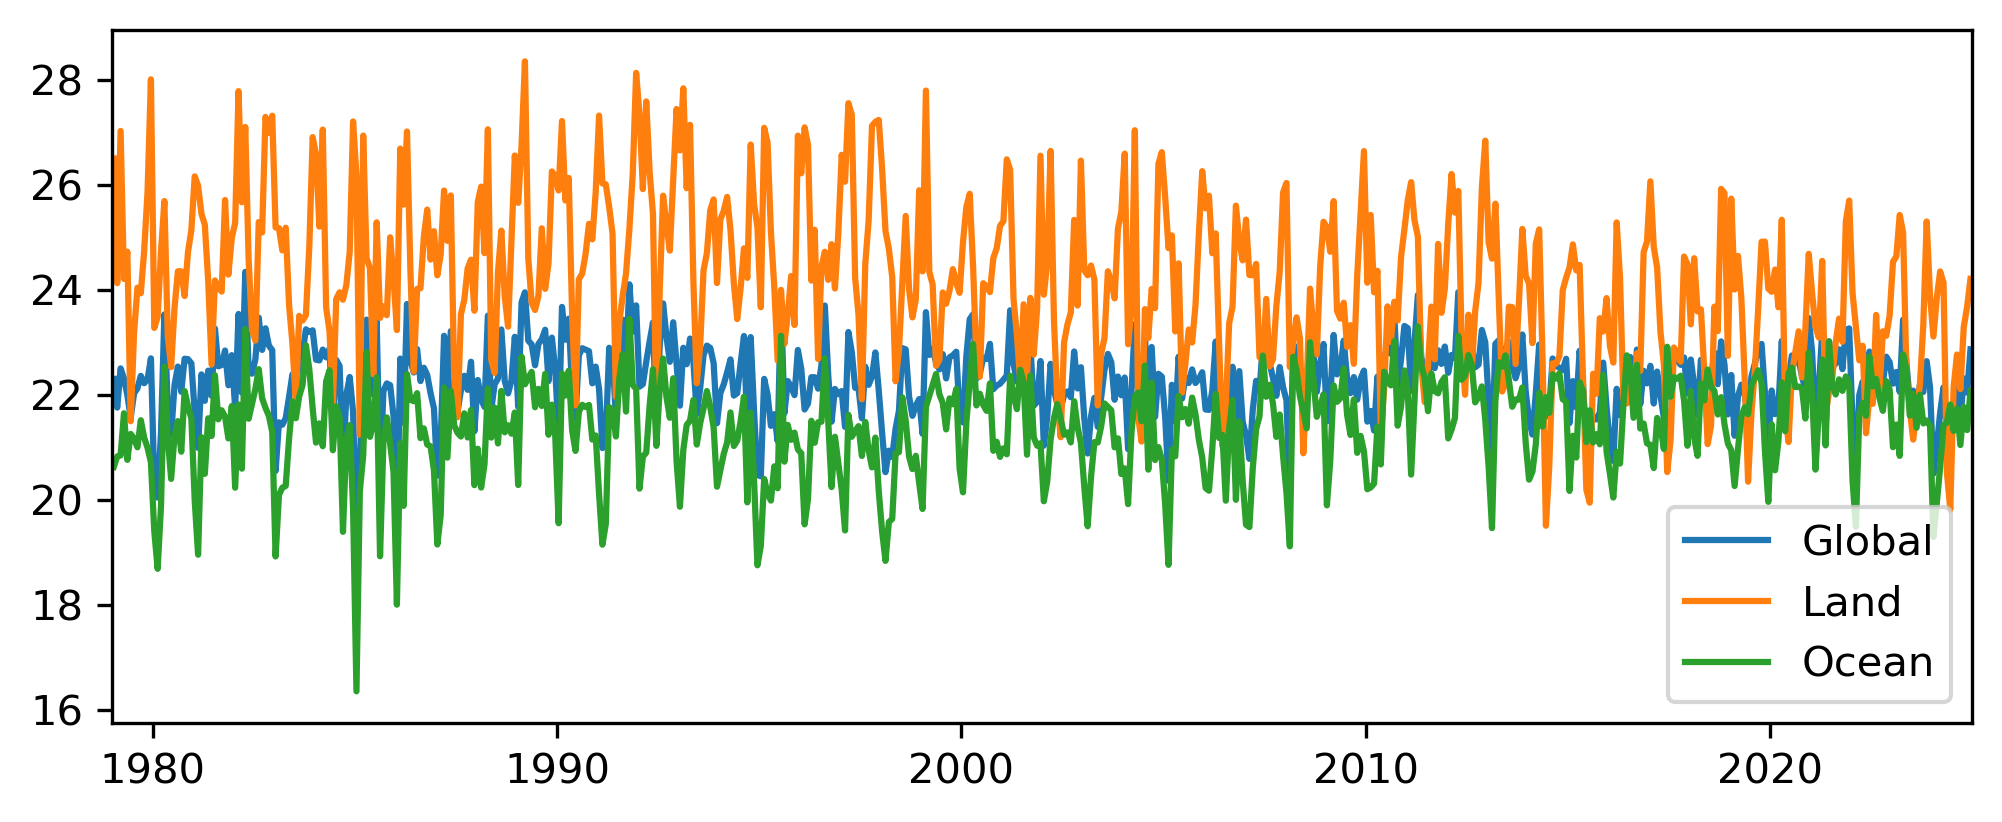

In [30]:
# define our arrays tohold the weightedmean UTH time series for each case
uth_ts_glb = np.full(tdim, np.nan)
uth_ts_lnd = np.full(tdim, np.nan)
uth_ts_ocn = np.full(tdim, np.nan)

# loop over each time step and andcalculated weighted mean UTH. In the case of the land and
# ocean vaues we apply the masks calculated previously
for tt, rh in enumerate(uth):
    mdx = tt % 12
    uth_ts_glb[tt] = np.nansum(uth[tt,:,:]*wgts)/np.nansum(wgts)
    uth_ts_lnd[tt] = np.nansum(uth[tt,:,:][land]*wgts[land])/np.nansum(wgts[land])
    uth_ts_ocn[tt] = np.nansum(uth[tt,:,:][ocean]*wgts[ocean])/np.nansum(wgts[ocean])

# make a simple plot of the results
plt.figure(figsize=(8,3),dpi=300)
plt.plot(hirs_data['time'], uth_ts_glb, label='Global')
plt.plot(hirs_data['time'], uth_ts_lnd, label='Land')
plt.plot(hirs_data['time'], uth_ts_ocn, label='Ocean')
plt.xlim(1979,2025)
plt.legend(loc=4)

- Finally, we can now calculate our anomaly time series
- This follows the same process as above, with one exception
- We are now going to define a reference period for calculating the climatology between 1980 and 2000 (20 year average)

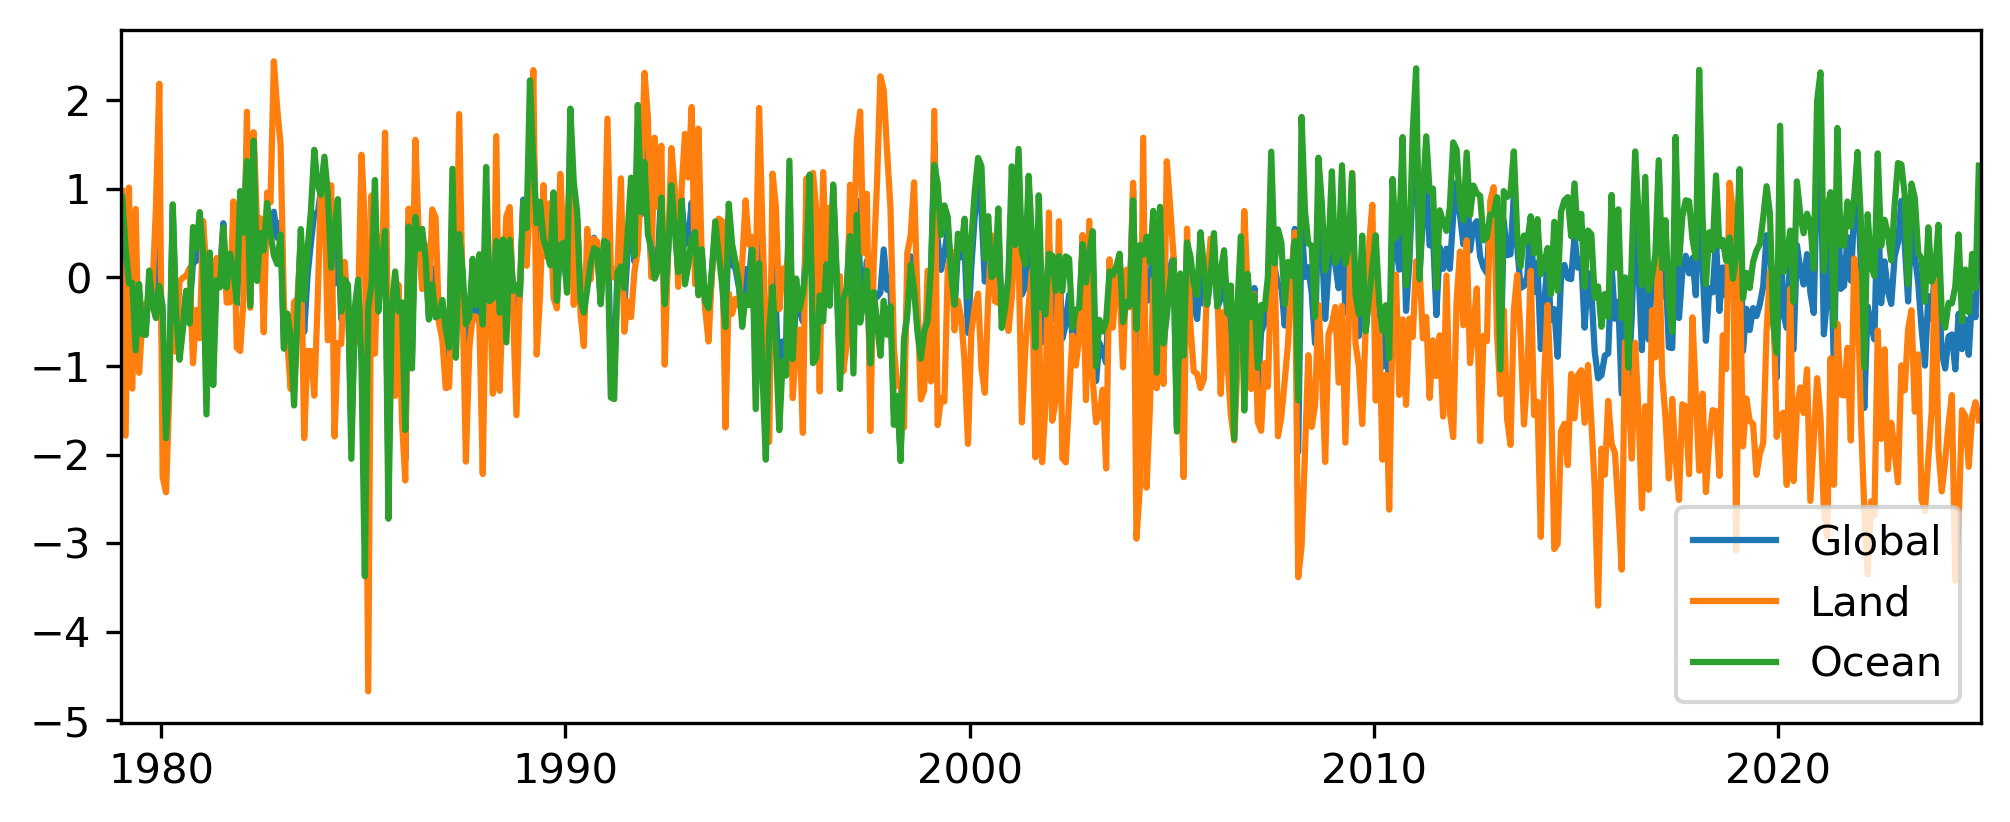

In [32]:
# define ourr arrays
anom_glb = np.full(tdim, np.nan)
anom_lnd = np.full(tdim, np.nan)
anom_ocn = np.full(tdim, np.nan)

# we will use a 20 year reference period between 1980 to 2000
ref_time = np.where((hirs_data['time'] >= 1980)&(hirs_data['time'] < 2001))

# loop over each month step between 0-11 and calculate the anomaly
for mth in range(12):
    anom_glb[mth::12] = uth_ts_glb[mth::12] - np.nanmean(uth_ts_glb[ref_time][mth::12])
    anom_lnd[mth::12] = uth_ts_lnd[mth::12] - np.nanmean(uth_ts_lnd[ref_time][mth::12])
    anom_ocn[mth::12] = uth_ts_ocn[mth::12] - np.nanmean(uth_ts_ocn[ref_time][mth::12])

# make a simple plot
plt.figure(figsize=(8,3),dpi=300)
plt.plot(hirs_data['time'], anom_glb, label='Global')
plt.plot(hirs_data['time'], anom_lnd, label='Land')
plt.plot(hirs_data['time'], anom_ocn, label='Ocean')
plt.xlim(1979,2025)
plt.legend(loc=4)

### Task 7: Saving our data
- So we have just processed a whole CDR of UTH from HIRS
- It is good practice to ave your processing at regular steps so you do not need to rerun lots of code unnecessarily
- Therefore, we shall write our anomaly time series to file and store it in comma-seperated variable (csv) format
- This has the advantage of being able to import the data again using python or another language. You can also load csv files in excel

In [33]:
# This our code to save the outputs
# we open a file called uth_anomoly_timeseries.csv and assign it to a file object we have named fobj
# we can the loop over each time step and write the results to file
with open("uth_anomoly_timeseries.csv", "w") as fobj:
    # first we write a header, the \n tells the computer to start a new line
    fobj.write("Frac_Year,Global,Land,Ocean\n")
    # here we use zip in order to interate over all arrays at the same time
    for yr, v1, v2, v3 in zip(hirs_data['time'], anom_glb,anom_lnd,anom_ocn):
        # we create a f string and write it to file
        fobj.write(f"{yr:0.3f}, {v1:0.2f}, {v2:0.2f}, {v3:0.2f}\n")

![](img/new_notebook.png)

## Task 
![](img/basic_workflow_cw1_pa260.png)

### In the new notebook follw these steps to perform the analysis of you new data:
1. define the python libraries you will need in the first cell and press the play button at the top of the page.
   ```python
   import numpy as np 
   import matplotlib.pyplot as plt
   from scipy.stats import norm
***
2. Next we need a function to read in our data. In the next cell copy in the following function and press the play button at the top of the page.
   ```python
   def read_csv(filename):
    """ read in the csv files we previously made of UTH anomaly time series.
    inputs: filename -> full path to file containing our data

    ouputs: results -> python dictionary containing our anomaly time series.
    """
    results = {}
    data = np.loadtxt(filename, skiprows=1, delimiter=",",dtype='<f4')
    header = np.genfromtxt(filename, delimiter=',', dtype=str, max_rows=1)
    for ii, varname in enumerate(header):
        results[varname] = data[:,ii]
    return results
***
### Now we need to add our functions we will use for our analysis
3. In the first workshop we used a function called <span style="color:blue">**simple_moving_average()**</span>, copy this into the next cell and press the play button at the top of the page.

4. Next we need a function for performing linear regression on our time series datasets. There are alot of different ways to this in python; however, we will use a function that we write ourselfs in this case. In the next cell copy the following function and press the play button at the top of the page.
    ```python
    def estimate_coef(x, y):
    """ python implimentation of linear regression.
    Inputs: x -> 1D array (e.g. fractional year)
            y -> 1D array (e.g. UTH anomaly)

    Outputs: coeffs -> tuple containing the intercept and gradient
    """
    # define number of observations/points
    n = np.size(x)
    
    # calculate the mean of the x and y vectors
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # calculate cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    # calculate regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0, b_1)
***
5. Finally, we will add our code for plotting some PDFs as we did in workshop 1. I have modified the function slightly for this workshop, can you see the updates?
    ```python
    def plot_delta_tas_probDensFunc(xvals, pre_glb_pdf, pre_lnd_pdf, pre_ocn_pdf, aft_glb_pdf, aft_lnd_pdf, aft_ocn_pdf, output=False):
    """ function to plot PDF distributions
    inputs: xvals         ->
            pre_glb_pdf
            pre_lnd_pdf
            pre_ocn_pdf
            aft_glb_pdf
            aft_lnd_pdf
            aft_ocn_pdf
            
            
    output:
    """
    plt.figure(figsize=(4,8),dpi=200)
    plt.subplot(211)
    plt.plot(xvals, pre_glb_pdf,lw=2,color='#A8AAB7',label='Global PDF')
    plt.plot(xvals, pre_lnd_pdf,'--',lw=2,color="#00A7B5",label='Land PDF')
    plt.plot(xvals, pre_ocn_pdf,'-.',lw=2,color="#F84C4F",label='Ocean PDF')
    plt.xlim(-3,2)
    plt.ylim(0,1.5)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel("PDF",fontsize=12)
    plt.xlabel(r"$\Delta$UTH [%]",fontsize=12)
    plt.title("a) 1978-2000")
    
    plt.subplot(212)
    plt.plot(xvals, aft_glb_pdf,lw=2,color='#A8AAB7',label='Global PDF')
    plt.plot(xvals, aft_lnd_pdf,'--',lw=2,color="#00A7B5",label='Land PDF')
    plt.plot(xvals, aft_ocn_pdf,'-.',lw=2,color="#F84C4F",label='Ocean PDF')
    plt.xlim(-3,2)
    plt.ylim(0,1.5)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel("PDF",fontsize=12)
    plt.xlabel(r"$\Delta$UTH [%]",fontsize=12)
    plt.title("b) 2001-2024")
        
    plt.tight_layout()
    

    # finally we test to see whether the figure will be saved as an .pdf file or rather 
    # just plotted within the notebook.
    if output == True:
        # save the figure with a descriptive name
        plt.savefig("UTH_PDF_land_ocean_global_analysis.pdf")
        plt.close()
    else:
        # just plot to screen
        pass
***
### Now we can begin our analysis
6. In the next cell we read in our data, complete the following code and press the play button at the top of the notebook.
    ```python
    # read in the data
    data =
***
7. Now we have the data read into memory, we will aplly a 12 month moving filter to smooththe time series. Complete the following code and press the play button at the top of the notebook.
    ```python
    # apply a simple 12 month moving average filter to our time series.
    anom_sma_glb = simple_moving_average(data['Global'],12)
    anom_sma_lnd = 
    anom_sma_ocn = 
***
8. Next we will calculate some trends using the smoothed timeseries. Complete the following code and press the play button at the top of the notebook.
    ```python
    # regress smoothed time series against fractional year and return linear fit coefficients
    glb_coeffs = estimate_coef(data['Frac_Year'], anom_sma_glb)
    lnd_coeffs = 
    ocn_coeffs =
***   
9. For this example the trend results will be collated into a table. For LaTeX, these have a specific format so what we can do write out a text file with the table with we can copy and paste into our LaTeX template. Copythe code below into the next cell and run it. Tis with produce a file called trend_results.txt in the same directory which you can double click on and open.
    ```python
    # define end of row for LaTeX
    endofrow=r"\\"
    units=r"\%/dec" 
    # create a list of the outputs we want to write to file
    table = [r"\begin{table}[t]",
             r"    \centering",
             r"    \caption{Decal trends in HIRS UTH for land, ocean, and cobimed (global) surfaces between $\pm$30^{\circ}.}",
             r"    \begin{tabular}{l c c}",
             r"        \toprule",
             f"        Region & Trend ({units}){endofrow}",
             r"        \midrule",
             f"        Global & {glb_coeffs[1]*120:0.2f}{endofrow}",
             f"        Land & {lnd_coeffs[1]*120:0.2f}{endofrow}",
             f"        Ocean & {ocn_coeffs[1]*120:0.2f}{endofrow}",
             r"        \bottomrule",
             r"    \end{tabular}",
             r"    \label{tab_uth_trends}",
             r"\end{table}"]
    
    with open("trend_results.txt", "w") as fobj:
        for line in table:
            fobj.write(f"{line}\n")
            
***
10.  Finally, we are going to plot some PDFs similar to those we saw in workshop 1. Again have a go at copying over and completing the following code before running this final step. you will notice that the output variable is set to True. This is so we can add the plot to our LaTeX template.
     ```python
        # calculate PDFs of UTH anonaly prior to 2001 and after 2001 for global, land and ocean results
        pre2000 = np.where(data['Frac_Year'] < 2001)
        aft2000 = np.where(data['Frac_Year'] >= 2001)
        
        pre_glb_pdf, xvals = calculate_probDensFunc(anom_sma_glb[pre2000], -5, 3, nbins=80)
        pre_lnd_pdf, xvals = 
        pre_ocn_pdf, xvals = 
        
        aft_glb_pdf, xvals = calculate_probDensFunc(anom_sma_glb[aft2000], -5, 3, nbins=80)
        aft_lnd_pdf, xvals = 
        aft_ocn_pdf, xvals = 
        
        plot_delta_tas_probDensFunc(xvals, pre_glb_pdf, pre_lnd_pdf, pre_ocn_pdf, aft_glb_pdf, aft_lnd_pdf, aft_ocn_pdf, output=True)

  
    

![](img/rename_notebbok_step1.png)

![](img/rename_notebbok_step2.png)

# we need 1 final plot:
![](img/final_plot_instructions.png)

![](img/final_outputs.png)

# Finally, Lets send ourselves the results we just made so we can add them to Overleaf

- open a terminal and type:
  zip -r results_cw3.zip hirs_uth_monthly_clim.pdf trend_results.txt UTH_PDF_land_ocean_global_analysis.pdf

- next, in the terminal type:
  mail -a results_cw3.zip <your uol email address>

- when prompted add the header for the email, e.g. 'CW3 results'

- Then press ctrl+d to send the email

- open you emails in windows and you should find the attachment. Download it and extract the files, these can then be imported into overleaf  